Final belief distribution: [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.45390447e-08
 1.30893707e-06 1.50527763e-05 1.10387027e-04 5.79531889e-04
 2.31812756e-03 7.34073726e-03 1.88761815e-02 4.01118858e-02
 7.13100191e-02 1.11729123e-01 1.62986226e-01 2.07517138e-01
 1.98842376e-01 1.25555862e-01 4.55553733e-02 7.15061415e-03]


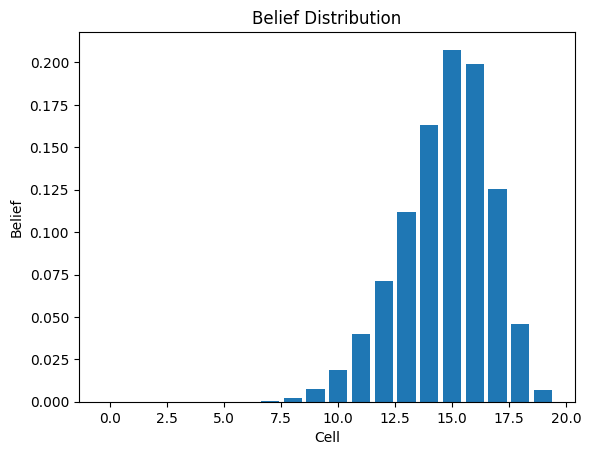

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def initialize_belief(cells, initial_position):
    belief = np.zeros(cells)
    belief[initial_position] = 1.0
    return belief

def move_forward(belief):
    cells = len(belief)
    new_belief = np.zeros(cells)

    for i in range(cells):
        if i == cells - 1:
            new_belief[i] += belief[i]
        if i == cells - 2:
            new_belief[i + 1] += 0.75 * belief[i]  # Move to the last cell 
            new_belief[i] += 0.25 * belief[i]  # Stay in same cell
        else:
            new_belief[i] += 0.25 * belief[i]
            if i + 1 < cells:
                new_belief[i + 1] += 0.50 * belief[i]  # Move to next cell
            if i + 2 < cells:
                new_belief[i + 2] += 0.25 * belief[i]  # Move two cells forward
    return new_belief / new_belief.sum()


def move_backwards(belief):
    cells = len(belief)
    new_belief = np.zeros(cells)
    for i in range(cells):
        if i == 0:  # Edge Case: First cell
            new_belief[i] += belief[i]  # 100% stay in the first cell
        elif i == 1:  # Edge Case: Second cell
            new_belief[i] += 0.25 * belief[i]  # 25% stay in the same cell
            new_belief[i - 1] += 0.75 * belief[i]  # 75% move to the first cell
        else:
            new_belief[i] += 0.25 * belief[i]  # 25% stay in the same cell
            new_belief[i - 1] += 0.50 * belief[i]  # 50% move to the previous cell
            if i - 2 >= 0:
                new_belief[i - 2] += 0.25 * belief[i]  # 25% move two cells back
    return new_belief / new_belief.sum()

# Initialize parameters
cells = 20
initial_position = 9  # 10th cell (0-based index)

# Initialize belief
belief = initialize_belief(cells, initial_position)
belief_list = []
belief_list.append(belief)

# Perform 9 forward movements
for _ in range(9):
    belief = move_forward(belief)
    belief_list.append(belief)

# Perform 3 backward movements
for _ in range(3):
    belief = move_backwards(belief)
    belief_list.append(belief)

# Display final belief distribution
print("Final belief distribution:\n", belief)

belief_table = pd.DataFrame(belief_list)

# Add column and row labels
belief_table.columns = [f'Cell {i+1}' for i in range(len(belief_list[0]))]
belief_table.index = [f'Time Step {i}' for i in range(len(belief_list))]

# Display the table
# display(belief_table)

plt.bar(range(cells), belief)
plt.xlabel('Cell')
plt.ylabel('Belief')
plt.title('Belief Distribution')
plt.show()


Final belief distribution: [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.84623883e-08
 1.88309732e-06 2.16556192e-05 1.58807874e-04 8.33741338e-04
 3.33496535e-03 1.05607236e-02 2.71561464e-02 5.77068112e-02
 1.02589887e-01 1.53884830e-01 1.93356433e-01 1.95736040e-01
 1.48986894e-01 7.78227629e-02 2.44149844e-02 3.43335719e-03]


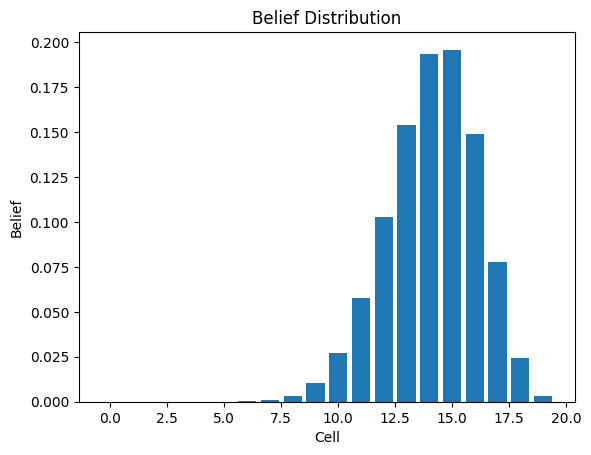

In [2]:
import numpy as np

def initialize_belief(cells, initial_position):
    belief = np.zeros(cells)
    belief[initial_position] = 1.0
    return belief

def move_forward(belief):
    cells = len(belief)
    new_belief = np.zeros(cells)
    for i in range(cells):
        new_belief[i] += 0.25 * belief[i]  # Stay in same cell
        if i + 1 < cells:
            new_belief[i + 1] += 0.50 * belief[i]  # Move to next cell
        if i + 2 < cells:
            new_belief[i + 2] += 0.25 * belief[i]  # Move two cells forward
    return new_belief / new_belief.sum() # normalize

def move_backwards(belief):
    cells = len(belief)
    new_belief = np.zeros(cells)
    for i in range(cells):
        if i == 0:
            new_belief[i] += belief[i]
        else: 
            new_belief[i] += 0.25 * belief[i]  # Stay in same cell
        if i - 1 >= 0:
            new_belief[i - 1] += 0.50 * belief[i]  # Move to previous cell
        if i - 2 >= 0:
            new_belief[i - 2] += 0.25 * belief[i]  # Move two cells back
    return new_belief / new_belief.sum()

# Initialize parameters
cells = 20
initial_position = 9  # 10th cell (0-based index)

# Initialize belief
belief = initialize_belief(cells, initial_position)

# Perform 9 forward movements
for _ in range(9):
    belief = move_forward(belief)

# Perform 3 backward movements
for _ in range(3):
    belief = move_backwards(belief)

# Display final belief distribution
print("Final belief distribution:", belief)
import matplotlib.pyplot as plt

plt.bar(range(cells), belief)
plt.xlabel('Cell')
plt.ylabel('Belief')
plt.title('Belief Distribution')
plt.show()

# [0.000000e+00 0.000000e+00 0.000000e+00 1.000000e-07 2.400000e-06
#  1.730000e-05 1.178000e-04 6.449000e-04 2.547500e-03 8.016100e-03
#  2.055940e-02 4.387120e-02 7.792200e-02 1.207412e-01 1.693115e-01
#  2.050976e-01 1.883722e-01 1.152398e-01 4.114760e-02 6.391400e-03]

# Simulation

[0.00000000e+00 0.00000000e+00 0.00000000e+00 5.20000000e-08
 1.43450000e-06 1.64385000e-05 1.20675500e-04 6.33671000e-04
 2.53484850e-03 8.02350450e-03 2.06306000e-02 4.38319725e-02
 7.79242045e-02 1.20655873e-01 1.69416368e-01 2.05042473e-01
 1.88279459e-01 1.15444315e-01 4.10821870e-02 6.36192300e-03]


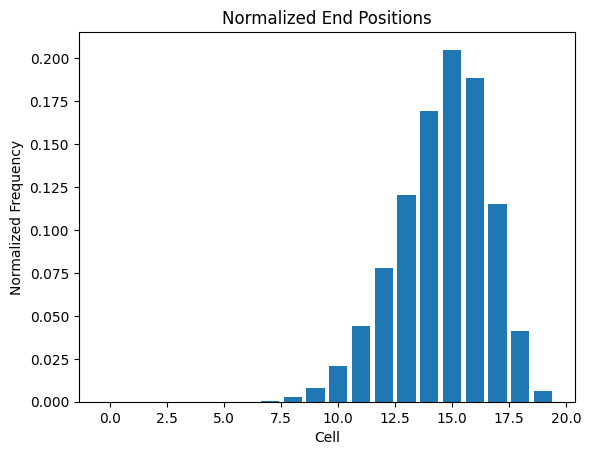

In [1]:
import cupy as cp
import matplotlib.pyplot as plt

def simulate_vectorized_incremental(num_simulations, num_forward, num_backward, grid_size=20, chunk_size=100_000_000):
    total_counts = cp.zeros(grid_size, dtype=cp.int32)  # To accumulate counts

    num_chunks = num_simulations // chunk_size
    for chunk in range(num_chunks):
        # Simulate a chunk of simulations
        positions = cp.full(chunk_size, 9, dtype=cp.int32)  # Start all at position 9

        # Forward movements
        for _ in range(num_forward):
            moves = cp.random.choice(cp.array([0, 1, 2]), size=chunk_size, p=cp.array([0.25, 0.50, 0.25]))
            positions = cp.clip(positions + moves, 0, grid_size - 1)

        # Backward movements
        for _ in range(num_backward):
            moves = cp.random.choice(cp.array([0, -1, -2]), size=chunk_size, p=cp.array([0.25, 0.50, 0.25]))
            positions = cp.clip(positions + moves, 0, grid_size - 1)

        # Use cp.add.at for in-place accumulation
        cp.add.at(total_counts, positions, 1)

    # Normalize the final count
    normalized_end_positions = total_counts / total_counts.sum()
    return normalized_end_positions

# Run the simulation with 1 billion simulations
num_simulations = 2_000_000_000  # 1 billion simulations
num_forward = 9
num_backward = 3
grid_size = 20

# This will accumulate counts in place without requiring chunked arrays
normalized_end_positions = simulate_vectorized_incremental(num_simulations, num_forward, num_backward, grid_size)

# Transfer to CPU for further analysis or plotting
normalized_end_positions = cp.asnumpy(normalized_end_positions)

print(normalized_end_positions)
# Plot the results
plt.bar(range(grid_size), normalized_end_positions)
plt.xlabel('Cell')
plt.ylabel('Normalized Frequency')
plt.title('Normalized End Positions')
plt.show()
